In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("hangboard_data.csv")
data

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,left,straight,1.30,22
1,1,2022-12-23,1,right,straight,0.80,22
2,1,2022-12-23,2,left,straight,1.70,22
3,1,2022-12-23,2,right,straight,2.46,22
4,1,2022-12-23,3,left,straight,2.02,22
5,1,2022-12-23,3,right,straight,1.35,22
6,1,2022-12-23,1,left,bent,1.46,22
7,1,2022-12-23,1,right,bent,1.33,22
8,1,2022-12-23,2,left,bent,3.05,22
9,1,2022-12-23,2,right,bent,6.64,22


# Comparing arm capacity

In [26]:
left_hang = data[data['arm']== 'left']
left_hang

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,left,straight,1.30,22
2,1,2022-12-23,2,left,straight,1.70,22
4,1,2022-12-23,3,left,straight,2.02,22
6,1,2022-12-23,1,left,bent,1.46,22
8,1,2022-12-23,2,left,bent,3.05,22
10,1,2022-12-23,3,left,bent,2.24,22
12,1,2022-12-23,1,left,lockoff,1.02,22
14,1,2022-12-23,2,left,lockoff,2.03,22
16,1,2022-12-23,3,left,lockoff,0.99,22


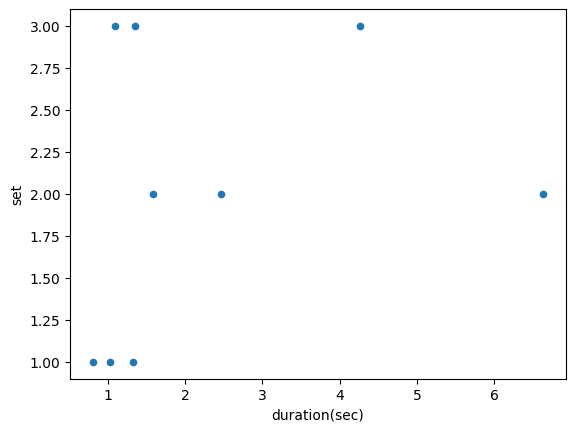

In [41]:
right_arm = data[data['arm']== 'right']
right_arm.plot(kind='scatter', x='duration(sec)', y= 'set')
plt.show()